# Implementacion Perceptron en Python
En este notebook, implementaremos un perceptrón para resolver un problema de clasificación.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Lectura de Datos

In [23]:
df = pd.read_csv('datos-enc.csv', sep=';')

In [24]:
df

,Tiempo Soleado,Tiempo Nublado,Temperatura Calor,Temperatura Frio,Humedad Alta,Viento Debil,Juega Tenis
0,1,0,1,0,1,1,0
1,1,0,1,0,1,0,0
2,0,1,1,0,1,1,1
3,0,0,0,0,1,1,1
4,0,0,0,1,0,1,1
5,0,0,0,1,0,0,0
6,0,1,0,1,0,0,1
7,1,0,0,0,1,1,0
8,1,0,0,1,0,1,1
9,0,0,0,0,0,1,1


### Formulación del Modelo

In [25]:
# Matriz de Features
X = df.drop('Juega Tenis', axis=1).values

# Variable objetivo
y = df['Juega Tenis'].values

In [26]:
(X,y)

(array([[1, 0, 1, 0, 1, 1],
        [1, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 1, 1],
        [1, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 1, 0]], dtype=int64),
 array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64))

In [27]:
# Define una función que calcule el producto punto entre dos vectores:
def dot_product(x, w):
    return np.dot(x,w)


In [28]:
dot_product(np.array([1,2,3]),np.array([1,2,3]))

14

In [29]:
# Define la función de activación. 
def activation(x):
   # en este caso será la función escalón
    return 1 if x>=0 else 0

In [30]:
activation(-2)

0

In [31]:
# Define la función de entrenamiento del perceptrón:
def perceptron_train(X, y, num_epochs, learning_rate):
    #inicializar pesso de forma aleatoria
    weights=np.random.rand(X.shape[1])
    

    # acá dejaremos el error que hubo entre lo real y lo calculado
    # de cada iteración
    errors=[]
    
    # iterar las epocas
    for epochs in range(num_epochs):
        
        epoch_error=0

        #itera sobre todos los elementos del set de entrenamiento
        for i in range(X.shape[0]):
            # calcular la salida del perceptron
            output=activation(dot_product(X[i], weights))
            # contabilizar el error
            if output!=y[i]:
                # definimos la siguiente metrica de error
                error=y[i] - output
                # actualizamos los pesos si la salida es incorrecta
                weights=weights + learning_rate*error*X[i]
                epoch_error= epoch_error+abs(error)
        errors.append(epoch_error)

    return weights, errors
 

In [32]:
perceptron_train(X,y,30,0.1)

(array([ 0.00374936,  0.37899112, -0.0570276 , -0.04590079, -0.28567356,
         0.22877827]),
 [4,
  4,
  4,
  4,
  4,
  4,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3])

In [33]:
# Ahora puedes utilizar la función perceptron_train para entrenar el perceptrón con tus datos de entrenamiento:
# En este ejemplo, utilizamos los datos de entrenamiento X y y para entrenar el perceptrón durante 30 épocas, 
# con una tasa de aprendizaje de 0.1. 
# La función devuelve los pesos entrenados y los errores computados en cada epoch
weights, errors = perceptron_train(X, y, num_epochs=30, learning_rate=0.1)

In [34]:
# estos son los pesos calculados
weights

array([ 0.01479205,  0.29421386,  0.04853822, -0.01438074, -0.25424015,
        0.14820989])

## Haciendo Predicciones

In [35]:
# Para hacer predicciones con el perceptrón entrenado, utilizamos la siguiente función:
def perceptron_predict(x, weights):
    return activation(dot_product(x,weights))

In [36]:
# Puedes utilizarla para predecir la salida de un ejemplo dado:
x = np.array([1, 0, 1, 0 ,1, 1])
prediction = perceptron_predict(x, weights)
print(prediction) 

0


## Evaluando el desempeño

In [37]:
# forma tradicional
#lo de abajo es igual a 
#y_pred=[]
#for x in X:
 #   y_pred.append(perceptron_predict(x,weights))
# List Comprehension
#y_pred = [perceptron_predict(x, weights) for x in X]

In [38]:
# hacemos predicciones sobre el set X, por simplicidad no haremos cross validation, 
# pero debieramos siempre
y_pred = [perceptron_predict(x, weights) for x in X]
y_pred

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [39]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [40]:
# calculamos el accuracy
sum(y_pred==y)/len(y)

0.9285714285714286

In [41]:
errors

[5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

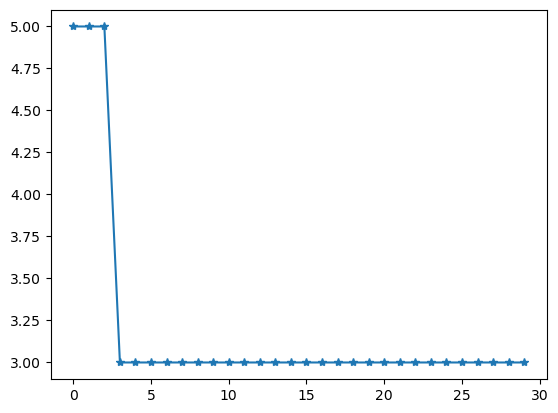

In [42]:
# graficamos los errores en cada epoch
plt.plot(errors, marker='*')